## 读取数据

In [10]:
import pandas as pd

filename = "./feature.csv"
file_output = "./output_feature.csv"
df = pd.read_csv(filename)
print type(df)
print df.shape

<class 'pandas.core.frame.DataFrame'>
(17282, 392)


In [134]:
file_directory = './output_3_files.csv'

In [2]:
file_output = "./output_feature.csv"

df.head(200).to_csv(file_output)


In [3]:
df2 = pd.read_csv(file_output)
print df2.shape

(200, 393)


In [4]:
filename1 = "./wq0118_records.csv"
filename3 = "./wp0071_records.csv"
df1 = pd.read_csv(filename1)
df3 = pd.read_csv(filename3)
print df1.shape
print df3.shape

(192747, 5)
(930222, 28)


In [163]:
filename2 = "./R047_R258_titration_records.csv"
df2 = pd.read_csv(filename2,parse_dates=['sampling_timestamp'])
df2.shape

(516, 5)

### 截取前200个输出

In [7]:
file_output1 = "./output_wq0118_records.csv"
file_output3 = "./output_wp0071_records.csv"

df1.head(200).to_csv(file_output1)
df3.head(200).to_csv(file_output3)

In [9]:
df01 = pd.read_csv(file_output1)
df03 = pd.read_csv(file_output3)

print df01.shape
print df03.shape

(200, 6)
(200, 29)


## 日期排序 & Merge

In [87]:
t_date = pd.to_datetime(df1['measurement_result_date'])

In [84]:
df_date = pd.to_datetime(df['timestamp'])

In [95]:
df_time_sort = df.drop(['timestamp'], axis=1)
df_time_sort['timestamp'] = df_date
df_time_sort.shape

(17282, 392)

In [93]:
df1_time_sort = df1.drop(['measurement_result_date'],axis=1)
df1_time_sort['measurement_result_date'] = t_date
df1_time_sort.shape

(192747, 5)

#### inner join

In [96]:
df_merge_tem = pd.merge(df1_time_sort, df_time_sort, left_on='measurement_result_date', right_on='timestamp',how='inner')
df_merge_tem.shape

(17282, 397)

#### 去重

In [115]:
df_plot_tem = df_merge_tem.drop_duplicates(['measurement_result_date'])
print "合并wp0118和feature, 并去重：",df_plot_tem.shape

合并wp0118和feature, 并去重： (8641, 397)


#### 处理wp0117的多个时间列

In [98]:
df3_date = pd.to_datetime(df3['Measurement Result Date'])
df3_time_sort = df3.drop(['Measurement Result Date'],axis=1)
df3_time_sort['measurement_result_date'] = df3_date
df3_time_sort.shape

(930222, 28)

In [229]:
df3_2_date = pd.read_csv(filename3,parse_dates=[['Measurement Result Date','Minute 5']])

In [233]:
df3_2_date.shape

(930222, 27)

In [234]:
tem = df3_2_date.loc[df3_2_date['Average Result Value']>0,['Measurement Result Date_Minute 5','Average Result Value']]

In [236]:
tem.sort_values(['Measurement Result Date_Minute 5'])

,Measurement Result Date_Minute 5,Average Result Value
318,2010-01-01 00:00:00,1
310392,2010-01-01 00:00:00,2
620466,2010-01-01 00:00:00,1
313623,2010-01-01 00:15:00,2
3549,2010-01-01 00:15:00,1
623697,2010-01-01 00:15:00,1
626928,2010-01-01 00:30:00,1
6780,2010-01-01 00:30:00,1
316854,2010-01-01 00:30:00,2
630159,2010-01-01 00:45:00,1


#### join 前一个merge_tem和wp0071

In [215]:
df_merge_com = pd.merge(df_merge_tem, df3_2_date, left_on='measurement_result_date', right_on='Measurement Result Date_Minute 15',how='inner')

In [213]:
df_merge_com.shape

(51846, 424)

In [129]:
df_3_merge = df_merge_com.drop_duplicates(['measurement_result_date'])

### df2 - titration_records

In [165]:
df2_time = df2['sampling_timestamp'].sort_values()

In [176]:
df2_merge = pd.merge(df_merge_com, df2, left_on='measurement_result_date', right_on='sampling_timestamp',how='inner')

In [177]:
df2_merge.shape

(84, 429)

### 时间戳唯一性检验 

In [22]:
df3['Measurement Result Date'].is_unique

False

In [62]:
df3.drop_duplicates(['Measurement Result Date']).shape

(3232, 28)

In [21]:
df1['measurement_result_date'].is_unique

True

In [24]:
df['timestamp'].is_unique

False

In [63]:
df.drop_duplicates(['timestamp']).shape

(8641, 392)

### merge

In [33]:
df_merge = pd.merge(df1, df3, left_on='measurement_result_date', right_on='Measurement Result Date',how='inner')
df_merge.shape

(578613, 33)

In [111]:
df_drop_du = df_merge_feature.drop_duplicates(['measurement_result_date'])

#### plot - measurement_result_date & average_result_value

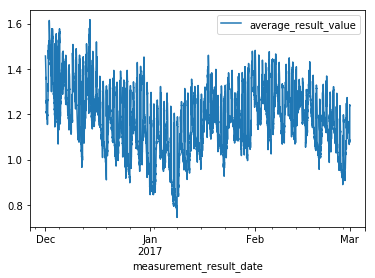

In [144]:
df_drop_plot = DataFrame()
df_drop_plot['measurement_result_date'] = pd.to_datetime(df_complete['measurement_result_date'])
df_drop_plot['average_result_value'] = df_complete['average_result_value']
df_drop_plot.plot(x='measurement_result_date', y='average_result_value')
plt.show()

### 合并后文件导出

In [131]:
df_3_merge.shape

(8641, 424)

#### 去掉无关属性

In [190]:
drop_attrs = ['Day','Hour 1', 'Minute 30', 'Minute 5', 'Calendar Date']
df_com_drop = df_3_merge.drop(drop_attrs, axis=1)
df_com_drop.shape

(8641, 419)

#### 根据时间排序

In [191]:
df_complete = df_com_drop.sort_values(by=['measurement_result_date'])

#### 导出

In [192]:
df_complete.to_csv(file_directory, index=None)

## 3条线的plot

NameError: name 'ax1' is not defined

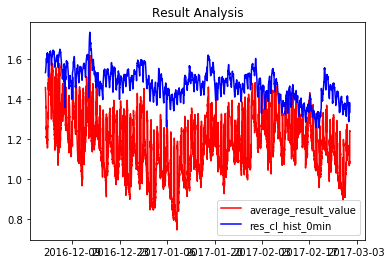

In [147]:
x_axis= df_complete['measurement_result_date']
y_label = df_complete['average_result_value']
y_zone_cl = df_complete['zone_flow_hist_0min']
y_res_cl = df_complete['res_cl_hist_0min']

#开始画图
plt.title('Result Analysis')
plt.plot(x_axis, y_label, color='red', label='average_result_value')
#plt.plot(x_axis, y_zone_cl,  color='green', label='zone_flow_hist_0min')
plt.plot(x_axis, y_res_cl, color='blue', label='res_cl_hist_0min')
plt.legend() # 显示图例

ax2 = ax1.twinx()  # this is the important function
ax2.plot(x_axis, y2, 'r')
ax2.set_xlim([0, np.e])
ax2.set_ylabel('Y values for ln(x)')
ax2.set_xlabel('Same X for both exp(-x) and ln(x)')

plt.xlabel('Times')
plt.ylabel('Chlorine')
plt.show()

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 10))

ax1 = fig.add_subplot(111)
ax1.plot(x_axis, y_label, color='red', label='average_result_value')
ax1.plot(x_axis, y_res_cl, color='blue', label='res_cl_hist_0min')
ax1.set_ylabel('chlorine')
ax1.set_title("data visualization")

# ax2 = ax1.twinx()  # this is the important function
# ax2.plot(x_axis, y_zone_cl, 'r', color='green', label='zone_flow_hist_0min')
# ax2.set_ylabel('folw')
# ax2.set_xlabel('time')

plt.grid(True)
 
plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)

plt.show()

NameError: name 'x_axis' is not defined

In [188]:
df_complete.loc[df_complete['Average Result Value'] ==0]

,average_result_value,statistic_type,asset_code,facility_code,measurement_result_date,zone_flow_hist_0min,zone_flow_hist_15min,zone_flow_hist_30min,zone_flow_hist_45min,zone_flow_hist_60min,...,Point Control Inhibited Indicator,Maintenance Indicator,Bad or Suspect Indicator,OPC Quality Indicator,Engineering Unit,TSV Measure,Universe Version Number,Site Name,Asset Code,Facility Code
0,1.4572,Snap (Current),WQM01,WQ0118,2016-12-01 00:00:00,0.537967,0.677703,0.838600,0.992196,1.086506,...,0.0,0,0,192.0,NaN,Average Result Value,2,WS0258 ENGADINE,PMP01,WP0071
252,1.4560,Snap (Current),WQM01,WQ0118,2016-12-01 00:15:00,0.374730,0.537967,0.677703,0.838600,0.992196,...,0.0,0,0,192.0,NaN,Average Result Value,2,WS0258 ENGADINE,PMP01,WP0071
24528,1.4540,Snap (Current),WQM01,WQ0118,2016-12-01 00:30:00,0.228371,0.374730,0.537967,0.677703,0.838600,...,0.0,0,0,192.0,NaN,Average Result Value,2,WS0258 ENGADINE,PMP01,WP0071
750,1.4432,Snap (Current),WQM01,WQ0118,2016-12-01 00:45:00,0.169935,0.228371,0.374730,0.537967,0.677703,...,0.0,0,0,192.0,NaN,Average Result Value,2,WS0258 ENGADINE,PMP01,WP0071
1002,1.4306,Snap (Current),WQM01,WQ0118,2016-12-01 01:00:00,0.172979,0.169935,0.228371,0.374730,0.537967,...,0.0,0,0,192.0,NaN,Average Result Value,2,WS0258 ENGADINE,PMP01,WP0071
25404,1.4292,Snap (Current),WQM01,WQ0118,2016-12-01 01:15:00,0.189868,0.172979,0.169935,0.228371,0.374730,...,0.0,0,0,192.0,NaN,Average Result Value,2,WS0258 ENGADINE,PMP01,WP0071
1500,1.4324,Snap (Current),WQM01,WQ0118,2016-12-01 01:30:00,0.206756,0.189868,0.172979,0.169935,0.228371,...,0.0,0,0,192.0,NaN,Average Result Value,2,WS0258 ENGADINE,PMP01,WP0071
1752,1.4230,Snap (Current),WQM01,WQ0118,2016-12-01 01:45:00,0.223645,0.206756,0.189868,0.172979,0.169935,...,0.0,0,0,192.0,NaN,Average Result Value,2,WS0258 ENGADINE,PMP01,WP0071
26262,1.4198,Snap (Current),WQM01,WQ0118,2016-12-01 02:00:00,0.240534,0.223645,0.206756,0.189868,0.172979,...,0.0,0,0,192.0,NaN,Average Result Value,2,WS0258 ENGADINE,PMP01,WP0071
26556,1.4128,Snap (Current),WQM01,WQ0118,2016-12-01 02:15:00,0.257422,0.240534,0.223645,0.206756,0.189868,...,0.0,0,0,192.0,NaN,Average Result Value,2,WS0258 ENGADINE,PMP01,WP0071


### 合并后开关状态全为0

In [208]:
df_merge_com['Average Result Value'].describe()

count    51846.000000
mean         0.107434
std          0.309667
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Average Result Value, dtype: float64